<a href="https://colab.research.google.com/github/fabnancyuhp/DEEP-LEARNING/blob/main/NOTEBOOKS/convolutional_neural_network_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example : CNN on CIFAR10 dataset

The CIFAR10 dataset is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. The 10 categories are 'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'<br>
In this example, we build a Convolutional neural network that will recognize images from the CIFAR10 dataset.

## Srep 1 : Download the CIFAR10 Dataset
In the cell below, we load the CIFAR-10 data set. We create a dictionary of the labels and their descriptions.

In [ ]:
class_names = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Step 2: displaying images from the training dataset
* we first display a single image
* secondly, we display an image of all possible labels.

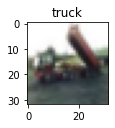

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1.5,1.5))
plt.title(class_names[y_train[2][0]])
plt.imshow(x_train[2])
plt.show()

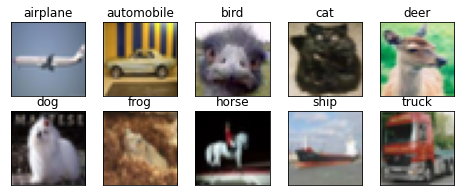

In [ ]:
import numpy as np

class_names = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

## Data preprocessing
In the CIFAR10 dataset 32x32 pixels are used to modelized each image. The pixel values are in the range of 0 to 255 for each of the red, green, and blue channels. It’s good practice to work with normalized data. We standardize the pixel values to the [0, 1] range by devising each pixel value by 255.

In [ ]:
x_train_scale = x_train / 255
x_test_scale = x_test / 255

## Build the CNN model
he convolutional neural network will be a stack of altered Conv2D and MaxPooling2d layers. Then a feedforward neural network will be added on top. In other words, we add Fully connected layers on top. We explain the working of each layer in the CNN model:
* layer1 is the Conv2d layer which convolves the image using 32 filters each of size (3*3). 
* layer2 is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2). 
* layer3 is the Conv2d layer which convolves the image using 64 filters each of size (3*3).
* layer4 is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2). 
* layer5 is the Conv2d layer which convolves the image using 128 filters each of size (3*3).
* layer6 is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2).
* layer7 is the Conv2d layer which convolves the image using 256 filters each of size (3*3).
* layer8 is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2).
* layer9 is flattening the output obtained from layer8 and this flattens output is passed to layer10. 
* layer10 is a hidden layer of a neural network containing 128 neurons.
* layer11 is a hidden layer of a neural network containing 64 neurons.
* layer12 is the output layer having 10 neurons for 10 classes of output that is using the softmax function.

In [ ]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dropout,Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
#model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
#model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 128)       

## Compile and Train the Model
We can now compile the model using the "categorical_crossentropy" loss function and the adam algorithm for the optimizer.<br>
Then we can fit this model with 45 epochs. The model doesn't know the batch size since we didn't specify it, so it is set to None. When the training will start, if the batch size is unspecified, the fit method will set it to 32. The training set contains about $50000\times0.9=45000$ images. The validation set contains $50000*0.1=5000$. We have 50,000 images that will be fed to the network by batches of 32 images. Then, it will take $45000/32\approx 1406.25$ steps to see all the images per epoch.

In [ ]:
#compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#TRAIN_HIST = model.fit(x_train_scale,y_train_cat,batch_size=32,epochs=100)
TRAIN_HIST = model.fit(x_train_scale,y_train,epochs=35,validation_split=0.1,verbose=0)

## Display the Model Training History:<br>

* summarize history for accuracy
* summarize history for loss

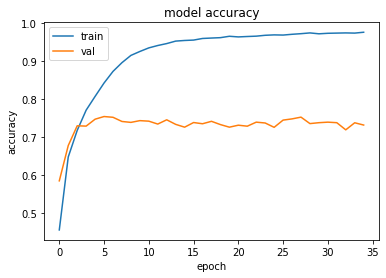

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(TRAIN_HIST.history['accuracy'])
plt.plot(TRAIN_HIST.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

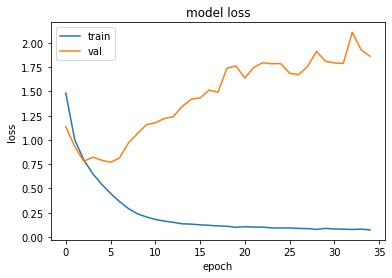

In [ ]:
# summarize history for loss
plt.plot(TRAIN_HIST.history['loss'])
plt.plot(TRAIN_HIST.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evaluate the model and use the model on a picked image over the test set
We evaluate the model:

In [ ]:
model.evaluate(x_test_scale,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.1130 - accuracy: 0.7253


[2.113048553466797, 0.7253000140190125]

We randomly choose an image from the test to use the model on it:

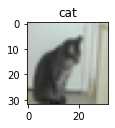

In [ ]:
import numpy as np
np.random.seed(1998)
index = np.random.randint(x_test.shape[0])
image_to_test = x_test[index,::]
label_image_to_test = y_test[index]

import matplotlib.pyplot as plt
plt.figure(figsize=(1.5,1.5))
plt.title(class_names[label_image_to_test[0]])
plt.imshow(image_to_test)
plt.show()

* Before to pass the image to the CNN, we have to reshape it
* Then model creates a probability vector
* We take the indice of the maximum value using np.argmax 

In [ ]:
pred_proba = model.predict(image_to_test.reshape(1,32,32,3)/255)

pred_class = np.argmax(pred_proba)
pred_class_label = class_names[pred_class]
pred_class_label

1/1 [==============================] - 0s 71ms/step


'cat'

# Exercice: Flower species classification
In this exercise, you will build a CNN to classify flower images. The model should predict the species of the flower. The first step is to load and describe the flowers dataset. Run the cell below to load the dataset.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

train_ds, metadata = tfds.load('tf_flowers',with_info=True,as_supervised=True)
train = train_ds['train']

import numpy as np
from tensorflow.keras import layers
import tensorflow as tf
MG_SIZE = 140

X_image = np.concatenate([tf.image.resize(image.numpy(), (MG_SIZE, MG_SIZE)).numpy().astype(np.uint8) for i,(image,label) in enumerate(train)],axis=0).reshape(3670,MG_SIZE,MG_SIZE,3)
Y = np.array([label.numpy() for i,(image,label) in enumerate(train)])
class_names = metadata.features['label'].names
class_names

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to ~/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

When we use google colab, we can be in trouble with the RAM. Then we should release some memory deleting ds, train_set....


When we use google colab, we can be in trouble with the RAM. Then we should release some memory deleting ds, train_set. We have to notice, we release some memory with the garbage collector python package.

In [109]:
import gc
del train_ds
del metadata
del train
gc.collect()

31110

In this exercise you work with X_image, a NumPy array of shapes (3670,MG_SIZE,MG_SIZE,3) representing 3670 distinct flower images. y_tot is a numpy array that store the species.<br>
We make 2 dictionary that allow to pass from  label number to the label name. 

In [9]:
class_number_to_class_name = dict([(class_names[i],i) for i in range(len(class_names))])
class_number_to_class_name
class_name_to_class_number = dict([(i,class_names[i]) for i in range(len(class_names))])
class_name_to_class_number, class_number_to_class_name

({0: 'dandelion', 1: 'daisy', 2: 'tulips', 3: 'sunflowers', 4: 'roses'},
 {'dandelion': 0, 'daisy': 1, 'tulips': 2, 'sunflowers': 3, 'roses': 4})

We display the numbered image 1000 and print its species:

the species is:daisy


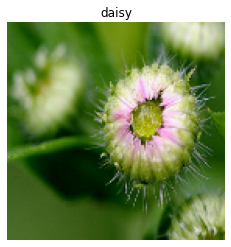

In [2]:
import matplotlib.pyplot as plt

#we select the image numbered 1000
x_selected = X_image[1000]
plt.imshow(x_selected)
plt.title(str(class_names[Y[1000]]))
plt.axis("off")

print("the species is:" +str(class_names[Y[1000]]))

We display 9 images from the flowers dataset.

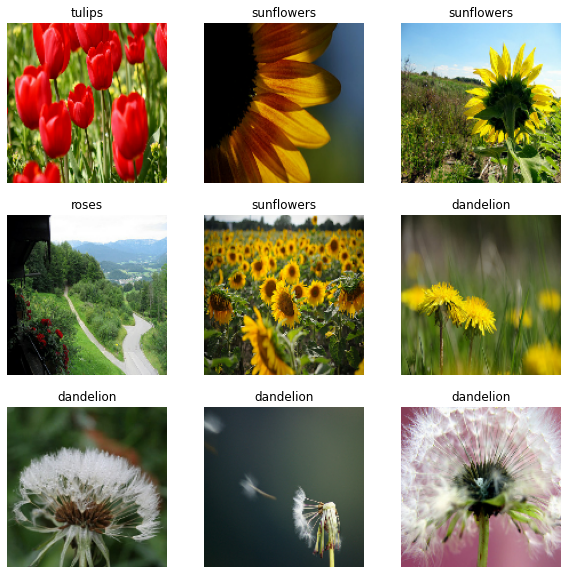

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
i = 0
for image in X_image[0:9]:
    plt.subplot(3, 3, i + 1)
    #image = tf.image.resize(image, (180, 180))
    plt.imshow(image)
    plt.title(class_names[Y[i]])
    plt.axis("off")
    i += 1

1/How many unique classes are there in the flowers dataset? What are the different species encountered in the flowers dataset?

In [8]:
#your code here
import numpy as np
print("the species are: "+ str(np.unique(Y)))
print("number of classes: "+str(len(np.unique(Y))))

the species are: [0 1 2 3 4]
number of classes: 5


2/ Display an image randomly choised for each species.

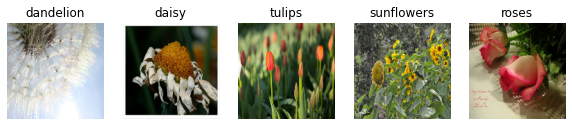

In [18]:
import matplotlib.pyplot as plt
import numpy as np

i= 0
plt.figure(figsize=(10, 10))
for specie in np.unique(Y):
  plt.subplot(1,5,i+1)
  ens = np.random.choice(np.where(Y==specie)[0],size=1,replace=False)
  image = X_image[ens][0]
  plt.imshow(image)
  plt.title(class_names[Y[ens][0]])
  plt.axis("off")
  i +=1

3/ Here, we create a data augmentation stage. data_augmentation applies rotation and flip on an image to create a new one.

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

Now, we have an original image:

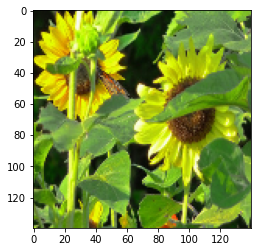

In [20]:
import matplotlib.pyplot as plt
plt.imshow(X_image[100])

The new image created by  data_augmentation:

(140, 140, 3)

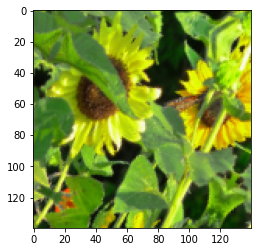

In [21]:
import matplotlib.pyplot as plt
import numpy as np
new_image = data_augmentation(X_image[100]).numpy().astype(np.uint8)
plt.imshow(new_image)
new_image.shape

Use data_augmentation to create 500 extra images of each species. You also have to create the label values. You should store the new images in a numpy array called X_image_augmented with a (2500, MG_SIZE, MG_SIZE, 3) shape. You should store the label in a numpy array called y_aug.

In [24]:
X_image_augmented = np.concatenate([data_augmentation(X_image[np.random.choice(np.where(Y==i)[0],size=500,replace=False)]).numpy() for i in np.unique(Y)],axis=0).reshape(2500,MG_SIZE,MG_SIZE,3)
Y_aug = np.concatenate([np.array([specie]*500) for specie in np.unique(Y)])

4/ 
* Concatenate X_image and X_image_augmented. Store the result in X_tot_image.
* Concatenate y_encoded and y_label_augmented_num. Store the result in Y_tot.

In [25]:
import numpy as np
#use np.concatenate
n = X_image_augmented.shape[0]+X_image.shape[0]
X_tot_image = np.concatenate([X_image_augmented,X_image],axis=0).reshape(n,MG_SIZE,MG_SIZE,3)
Y_tot = np.concatenate([Y_aug,Y],axis=0)

5/ Split X_tot_image and Y_tot into a training set and a test set. Use the sklearn train_test_split object with test_size=0.20 and stratify=Y_tot_encoded.

In [27]:
#X_tot_image, y_tot_encoded
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tot_image, Y_tot, test_size=0.20,stratify=Y_tot, random_state=42)

6/ Build a CNN with the following layers:
* Rescaling(1./255) layer wich standardize the pixel values to the [0, 1] range by devising each pixel value by 255.
* Conv2d layer which convolves the image using 32 filters each of size (3*3).
* MaxPooling2D() layer with with default arguments
* Conv2d layer which convolves the image using 32 filters each of size (3*3).
* MaxPooling2D() layer with with default arguments
* Conv2d layer which convolves the image using 32 filters each of size (3*3).
* MaxPooling2D() layer with with default arguments
* Flatten() layer
* Dense layer with 128 neurons and activation='relu'
* The last Dense layer. Choose correctly the number of neurons and the activation function

In [28]:
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
num_classes = 5

#your code here

model_flower = Sequential()
model_flower.add(Rescaling(1./255))
model_flower.add(Conv2D(filters=32,kernel_size=(3,3)))
model_flower.add(MaxPooling2D())
model_flower.add(Conv2D(filters=32,kernel_size=(3,3)))
model_flower.add(MaxPooling2D())
model_flower.add(Conv2D(filters=32,kernel_size=(3,3)))
model_flower.add(MaxPooling2D())
model_flower.add(Flatten())
model_flower.add(Dense(128,activation='relu'))
model_flower.add(Dense(5,activation='softmax'))

7/ 
* Compile the model using the "categorical_crossentropy" loss function, the adam algorithm for the optimizer and the accuracy metrics.
* Fit this model with 35 epochs and validation_split=0.1. For this purpose use X_train, y_train.

In [29]:
#your code here
model_flower.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_flower.fit(X_train,y_train,epochs=35,validation_split=0.1)

Epoch 1/35
139/139 [==============================] - 11s 20ms/step - loss: 1.2782 - accuracy: 0.4721 - val_loss: 1.1350 - val_accuracy: 0.5688
Epoch 2/35
139/139 [==============================] - 2s 15ms/step - loss: 1.0342 - accuracy: 0.5844 - val_loss: 1.0465 - val_accuracy: 0.6073
Epoch 3/35
139/139 [==============================] - 2s 16ms/step - loss: 0.8863 - accuracy: 0.6578 - val_loss: 0.9869 - val_accuracy: 0.6255
Epoch 4/35
139/139 [==============================] - 2s 15ms/step - loss: 0.7092 - accuracy: 0.7213 - val_loss: 0.9833 - val_accuracy: 0.6296
Epoch 5/35
139/139 [==============================] - 2s 16ms/step - loss: 0.4924 - accuracy: 0.8237 - val_loss: 1.1181 - val_accuracy: 0.6053
Epoch 6/35
139/139 [==============================] - 2s 16ms/step - loss: 0.3038 - accuracy: 0.9007 - val_loss: 1.2457 - val_accuracy: 0.6316
Epoch 7/35
139/139 [==============================] - 2s 16ms/step - loss: 0.1324 - accuracy: 0.9620 - val_loss: 1.5700 - val_accuracy: 0.641

8/ Evaluate your model over X_test and y_test.

In [30]:
#your code here
model_flower.evaluate(X_test,y_test)

39/39 [==============================] - 0s 12ms/step - loss: 2.6464 - accuracy: 0.6442


[2.6464450359344482, 0.6442463397979736]

9/ In this part we use the model you built to predict the class of a new picture. First, you have to load the picture running the cell below.

34958/34958 [==============================] - 0s 0us/step


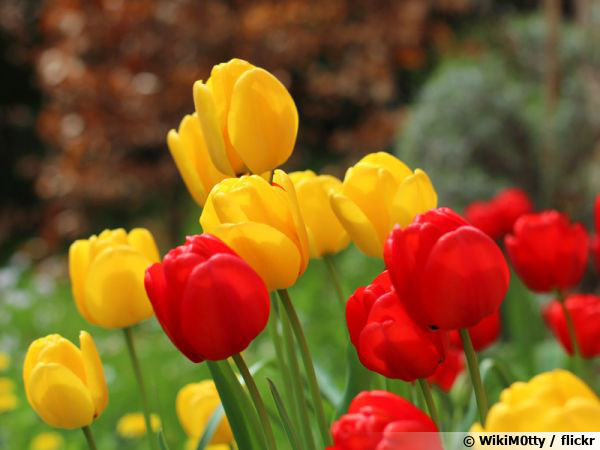

In [31]:
import tensorflow as tf
dataset_url = "https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/tulipes-600x450.jpg"
data_dir = tf.keras.utils.get_file(origin=dataset_url)
import numpy as np

import PIL.Image
PIL.Image.open(data_dir)

Before to pass the image to the model, we have to preprocess it:
* we convert the picture in a numpy array
* We resize the picture to make it suitable for the model. 
* We reshape the image

Run the cell below to preprocess the image.

In [33]:
import imageio
image_numpy = imageio.imread(data_dir)
image_resized = tf.image.resize(image_numpy, (140, 140)).numpy().astype("uint8") 

image_resized_reshape= image_resized.reshape(1,140,140,3)

Now, you have to apply the model you've just trained on image_resized_reshape and layout the prediction. Sometime the model misclasses the image.

In [35]:
#your code here
vect_prob = model_flower(image_resized_reshape).numpy()

#print the predicted specie

print("the predicted specie is:  "+str(class_names[np.argmax(vect_prob)]))

the predicted specie is:  roses
